In [6]:
import os
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from DLITE.SurfaceEvolver import SurfaceEvolver

In [7]:
os.chdir(r'../Notebooks/data/Synthetic_data/FOV_drift')
name_first = 'class_test_5_'
name_end = '.fe.txt'
number = 0.4

In [8]:
SurfaceEvolverInstance = SurfaceEvolver(name_first, name_end)

In [9]:
colonies = SurfaceEvolverInstance.FOV_Drift(number, solver = 'CellFIT')

Number of fit edges: 173
Length of cpresses 44 44
ground_truth [1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.13472386199658

/Users/ritvikvasan/Documents/repos/DLITE/DLITE/cell_describe.py:905: LinAlgWarning: Ill-conditioned matrix (rcond=8.65324e-19): result may not be accurate.
  x = linalg.solve(r2, y)  # Solve Rx=y


Next colony number 1
old cells
[0, 1, 2, 3, 4, 5]
new cells
[[], 0, 1, 2, 3, 4, 5, []]
[[], 0, 1, 2, 3, 4, 5, []]
no label?
no label?
Next colony number 2
old cells
[6, 0, 1, 2, 3, 4, 5, 7]
new cells
[6, 0, 1, 2, 3, 4, 5, 7]
[6, 0, 1, 2, 3, 4, 5, 7]
Next colony number 3
old cells
[6, 0, 1, 2, 3, 4, 5, 7]
new cells
[[], 6, 0, 1, [], 2, 3, 4, 5, 7, []]
[[], 6, 0, 1, [], 2, 3, 4, 5, 7, []]
no label?
no label?
no label?
Next colony number 4
old cells
[8, 6, 0, 1, 9, 2, 3, 4, 5, 7, 10]
new cells
[[], 8, [], 6, 0, 1, 9, 2, 3, 5, 7]
[[], 8, [], 6, 0, 1, 9, 2, 3, 5, 7]
no label?
no label?
Next colony number 5
old cells
[10, 8, 11, 6, 0, 1, 9, 2, 3, 5, 7]
new cells
[10, 8, 11, 6, 0, 1, [], 9, 2, 3, 5, 7]
[10, 8, 11, 6, 0, 1, [], 9, 2, 3, 5, 7]
no label?
Next colony number 6
old cells
[10, 8, 11, 6, 0, 1, 12, 9, 2, 3, 5, 7]
new cells
[10, 8, 11, 6, 0, 1, 12, 9, 2, 3, 7]
[10, 8, 11, 6, 0, 1, 12, 9, 2, 3, 7]
Next colony number 7
old cells
[10, 8, 11, 6, 0, 1, 12, 9, 2, 3, 7]
new cells
[[], 10, [],

In [10]:
colonies2 = SurfaceEvolverInstance.FOV_Drift(number, solver = 'DLITE')

Number of fit edges: 173
Length of cpresses 44 44
ground_truth [1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.1347238619965891, 1.13472386199658

Function value 0.1920399868367507
Solution [0.77924774 0.77670117 0.31756715 0.67381413 0.67714898 0.67534065
 0.34056525 0.36629833 0.35481163 0.39418786 0.37197183 0.37959479
 0.3318256  0.32452949 0.68455026 0.35170907 0.37154418 0.66956035
 0.68538214 0.35918169 0.33141972 0.6766075  0.68225412 0.67997442
 0.6802067  0.68609777 0.68671784 0.6798511  0.68657994 0.6798856
 0.67862006 0.67753693 0.68039844 0.68237598 0.69003592 0.67691232
 0.67644387 0.67833228 0.67626671 0.67734849 0.67714369 0.67891949
 0.6857927  0.68653352 0.69406821 0.68997234 0.69137653 0.68360827
 0.68533467 0.69855713 0.68081265 0.67989858 0.68399778]


-----------------------------
else
new objective
guess pressure is [0.009971642353961266, 0.011120656510544358, 0.008770009413667646, 0.009129251896165981, 0.010259808968630761, 0.013725110480349741, 0.011425732838413772, 0.010407459449230183]
Function value 5.131001725793579e-07
Solution [0.00997164 0.01162326 0.00869089 0.00904285 0.01013605 0.01351166
 0.011

Function value 0.4678035446919278
Solution [0.77462904 0.749707   0.74790332 0.73123784 0.73152449 0.72811828
 0.73401954 0.73486463 0.73463225 0.73119259 0.74567424 0.72624571
 0.7331481  0.37229398 0.72667592 0.72492305 0.76532835 0.77848382
 0.3196595  0.76763529 0.31450252 0.72374399 0.73183521 0.30910934
 0.73573217 0.73319779 0.73938839 0.31244284 0.74972411 0.75228147
 0.75838924 0.67704891 0.32266503 0.3468958  0.33633084 0.36751333
 0.35989675 0.31468071 0.33543359 0.67000692 0.34825524 0.36754299
 0.65838941 0.67019935 0.36877663 0.66953107 0.66899988 0.35104697
 0.33888735 0.68237037 0.66883538 0.67116528 0.67015251 0.66682578
 0.66741027 0.66791671 0.66889882 0.66901327 0.66829258 0.67044286
 0.66700289 0.66717154 0.66479062 0.66495439 0.67094888 0.67248896
 0.66615936 0.67315825 0.66623149 0.66713706 0.66391216 0.67155154
 0.66914626 0.66804622 0.66879932 0.66843141 0.66836833 0.67010368
 0.66708275 0.67431613 0.67035197 0.6705184 ]


-----------------------------
else
new

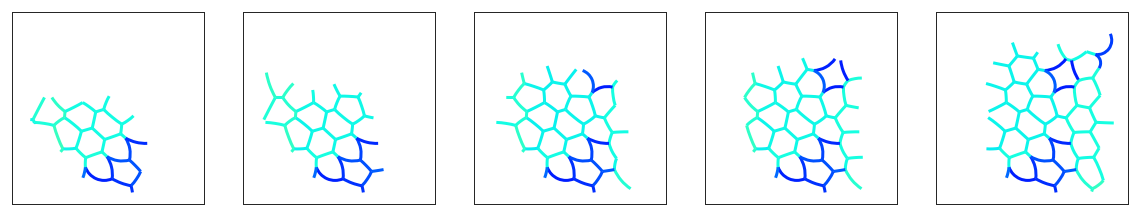

In [40]:
%matplotlib inline
sns.set(style="white")
sns.set_context("paper", font_scale = 2.5)

total = 5
fig, axn = plt.subplots(1, total, figsize = (20,20),sharey=True)
nums= [0,2, 4,6, 8]

for i, ax in enumerate(axn.flat):
    col = colonies2[str(nums[i])]
    tensions = [e.tension for e in col.tot_edges]
    mean_ten = np.mean(tensions)
    tensions = [e/mean_ten for e in tensions]

    col.plot_tensions(ax, fig, tensions, min_x=450, max_x=550, min_y=430, max_y=550, 
                      min_ten = 0, max_ten = 3, specify_color = 'jet',cbar = 'no', lw = 3)
    plt.setp(ax.get_yticklabels(), visible=False)
    plt.setp(ax.get_xticklabels(), visible=False)
    ax.set(xlim = [400,580], ylim = [400,580], aspect = 1)

In [15]:
from DLITE.PlottingFunctions import PlottingFunctions
PlottingFunctionsInstance = PlottingFunctions()

In [16]:
# We first find labels of edges that are present in all the colonies
common_edge_labels = PlottingFunctionsInstance.get_repeat_edge(colonies)
common_cell_labels = PlottingFunctionsInstance.get_repeat_cell(colonies)

common_edge_labels2 = PlottingFunctionsInstance.get_repeat_edge(colonies2)
common_cell_labels2 = PlottingFunctionsInstance.get_repeat_cell(colonies2)

In [17]:
# Make the dataframes
edges_dataframe, cells_dataframe = PlottingFunctionsInstance.seaborn_plot(None, colonies,
                                                                                  common_edge_labels,
                                                                                  common_cell_labels,
                                                                                  ground_truth = True)

# Make the dataframes
edges_dataframe2, cells_dataframe2 = PlottingFunctionsInstance.seaborn_plot(None, colonies2,
                                                                                  common_edge_labels2,
                                                                                  common_cell_labels2,
                                                                                  ground_truth = True)

/Users/ritvikvasan/Documents/repos/DLITE/DLITE/PlottingFunctions.py:1351: RuntimeWarning: invalid value encountered in true_divide
  cell_data['Pressures'].append([2*((c.pressure - min_pres) / float(max_pres - min_pres)) - 1 for c in v.cells if c.label == cell_lab][0])
/Users/ritvikvasan/Documents/repos/DLITE/DLITE/PlottingFunctions.py:1359: RuntimeWarning: invalid value encountered in true_divide
  - min_pres) / float(max_pres - min_pres))


In [18]:
tension_table = edges_dataframe.pivot_table(
        values='Local_normalized_tensions', 
        index=['Edge_Labels'], 
        columns='Time')

ground_truth_tension_table = edges_dataframe.pivot_table(
        values='Ground_truth', 
        index=['Edge_Labels'], 
        columns='Time')

tension_table2 = edges_dataframe2.pivot_table(
        values='Local_normalized_tensions', 
        index=['Edge_Labels'], 
        columns='Time')

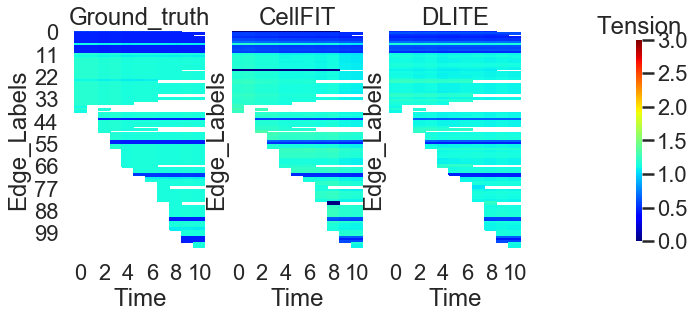

In [20]:
import seaborn as sns
import pylab
sns.set_context('poster')
fig, axn = plt.subplots(1, 3, figsize = (8,4),sharey=True)
cbar_ax = fig.add_axes([1.1, .15, .01, .7], title = 'Tension')

for i, ax in enumerate(axn.flat):
    if i == 0:
        df = ground_truth_tension_table
        title = 'Ground_truth'
    elif i == 1:
        df = tension_table
        title = 'CellFIT'
    elif i == 2:
        df = tension_table2
        title = 'DLITE'
    ax.set_title(title)
    sns.heatmap(df, ax=ax,
                cbar=i == 0, vmin=0, vmax=3, cmap = 'jet',
                cbar_ax=None if i else cbar_ax)


# pylab.savefig('heatmap.pdf')